# <font color="#067790">Projet 4 : Analysez les ventes de votre entreprise</font>

### Dans ce projet, il est prévu d'analyser les KPI liées aux performances commerciales et financières de la société.

Ce travail est découpé en 2 grandes parties : l'analyse marketing des variables de cet échantillon et la recherche de corrélations entre elles.<br/>


Les datas utilitées dans ce notebook principal ont été préalablement nettoyées via notebook nettoyage Projet 4.<br/>

## Tables des matières <a id="sommaire"></a>
0. [Import des librairies et des data nettoyées](#data)<br/>
1. [Analyse echantillon](#Analyse)<br/>
   1.1 [Analyse client](#client)<br/>
      1.1.1 [Les BtoB](#btob)<br/>
      1.1.2 [Les juniors de 18 à 30 ans](#junior)<br/>
      1.1.3 [Les middle age de 31 à 50 ans](#middleage)<br/>
      1.1.4 [Les seniors de 51 à 90 ans](#senior)<br/>
      1.1.5 [Focus sur les mauvais clients](#mauvais)<br/>
      1.1.6 [Depense client](#depense)<br/>
    1.2 [Offre produits](#produit)<br/>
    1.3 [Santé financière](#sante)<br/>
    1.4 [Connexions](#connexions)<br/>
    
2. [Recherche de corrélations](#corrélation)<br/>
    2.1 [Corrélation entre sexe et catégorie de produits achetés](#sexe_catégorie)<br/>
    2.2 [Corrélation entre age et montant total des achats](#montant_total_achat)<br/>
    2.3 [Corrélation entre age et fréquence des achats](#frequence_achat)<br/>
    2.4 [Corrélation entre age et panier moyen d'achats](#panier_moyen)<br/>
    2.5 [Correlation et age et catégorie de produits achetés](#produit_achetés)
    

## [0. Import des librairies et des data nettoyées](#sommaire)
<a id="data" a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import spearmanr
import statsmodels.formula.api 
import statsmodels.api

In [17]:
import seaborn as sns
sns.__version__

'0.10.0'

In [3]:
# Lecture des 4 dataframes 
dfc = pd.read_csv("data/customers_cleaned.csv")
df = pd.read_csv("data/transactions_cleaned.csv")
dfp = pd.read_csv("data/products_cleaned.csv")
dfs = pd.read_csv("data/sessions_cleaned.csv")

In [4]:
# Dataframe sur les sessions
dfs.head()

,session_id,sales_count,sales_sum,client_id,year,month,age,sex
0,s_118668,14,264.99,c_5995,2021,11,30,f
1,s_96857,13,277.31,c_5523,2021,9,52,f
2,s_21005,13,162.20,c_8303,2021,4,32,m
3,s_168560,12,182.24,c_7855,2022,2,32,f
4,s_93892,12,130.58,c_8127,2021,9,34,f


In [5]:
# Dataframe sur les transactions
df.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,year,month,day
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,45,2021,4,10
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,22,2022,2,3
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,43,2021,9,23
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,59,2021,10,17
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,42,2021,7,17


In [6]:
# Dataframe sur le catalogue produit
dfp.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [7]:
# Dataframe sur le catalogue client
dfc.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


## [1. Analyse de l'échantillon](#sommaire)
<a id="Analyse" a/>

## [1.1 Analyse client](#sommaire)
<a id="client" a>

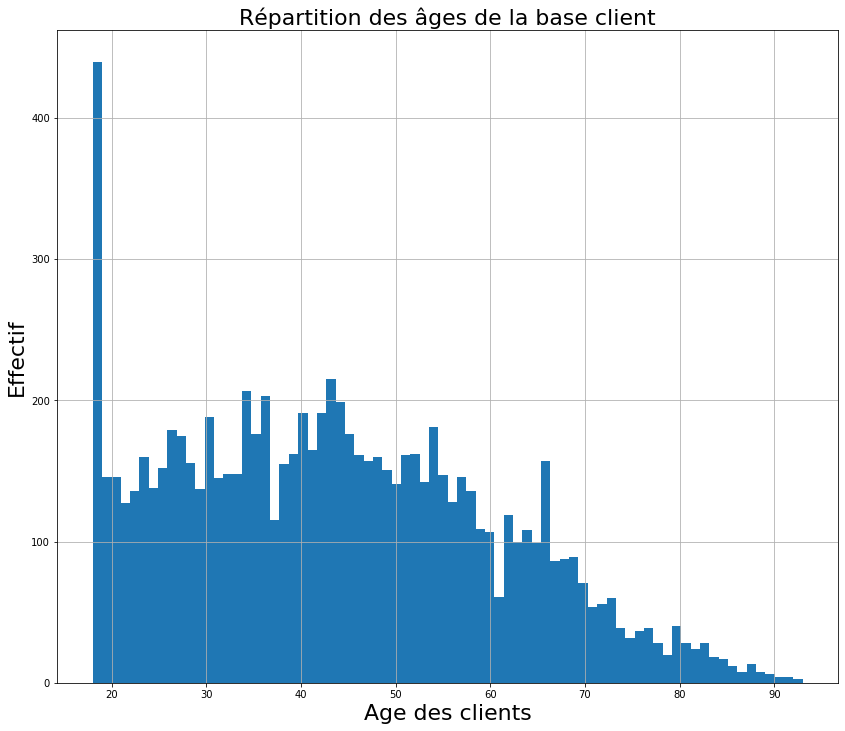

In [23]:
# Répartition des ages de la base client par effectif
plt.figure(figsize=(14,12))
dfc["age"].hist(bins=76)
plt.xlabel('Age des clients', fontsize = 22)
plt.ylabel('Effectif', fontsize =22)
plt.title('Répartition des âges de la base client', fontsize = 22)
plt.show()

Text(0, 0.5, 'CA')

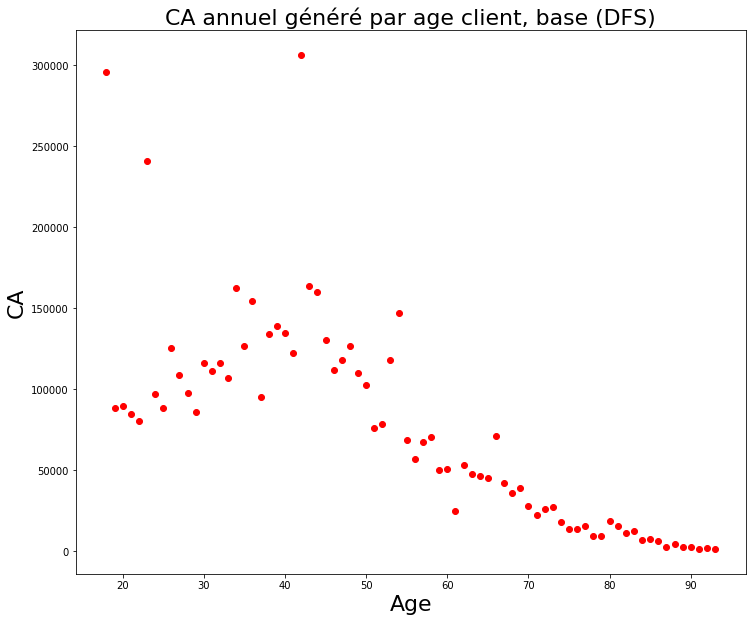

In [25]:
# Repérage des cibles client avec un fort potentiel d’ achat --> CA annuel par tranche d'age client 
A = dfs.groupby('age').sum().sales_sum.to_frame()
A = A.reset_index()
A.columns = ['Age','CA']
A.sort_values(by='CA',ascending = False).head()

# Graphique de ce chiffre d'affaires généré par âge
x = A.Age
y = A.CA
plt.figure(figsize=(12,10))
plt.scatter(x, y, c = 'red')
plt.title('CA annuel généré par age client, base (DFS)',fontsize = 22)
plt.xlabel('Age',fontsize = 22)
plt.ylabel('CA',fontsize = 22)


Text(0, 0.5, 'CA')

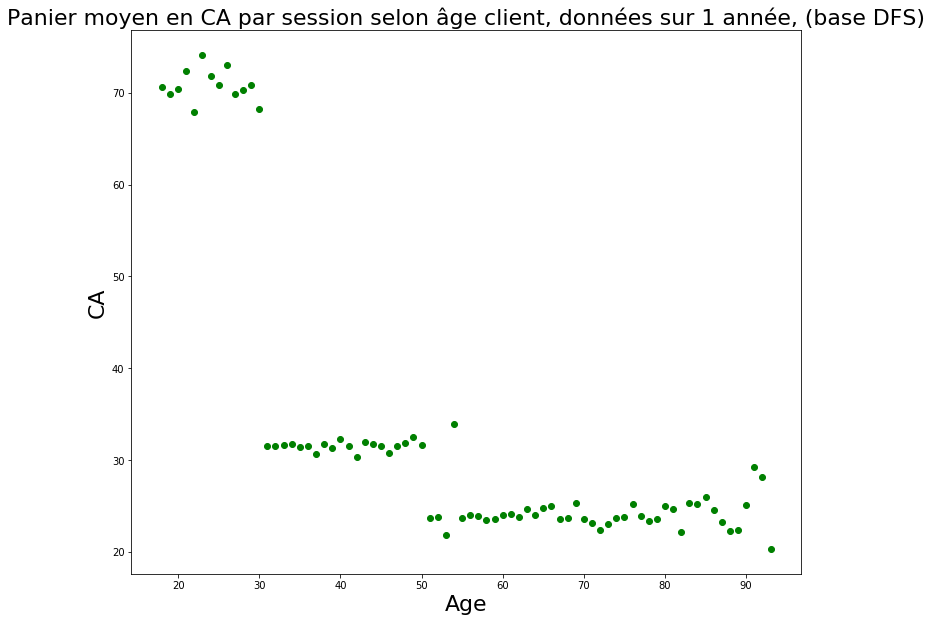

In [28]:
# Repérage des cibles client avec un fort potentiel d’ achat -> Montant d'une session par tranche d'age 
B = dfs.groupby('age').mean().sort_values(by='sales_sum', ascending = False).sales_sum.to_frame()
B = B.reset_index()
B.columns = ['Age','Depense']
x = B.Age
y1 = B.Depense
plt.figure(figsize=(12,10))
plt.scatter(x, y1, c = 'green')
plt.title('Panier moyen en CA par session selon âge client, données sur 1 année, (base DFS)', fontsize =22)
plt.xlabel('Age', fontsize =22)
plt.ylabel('CA', fontsize =22)

## <font color="#067790"> Controle qualité des données </font>

In [17]:
# Vérifier si 18 ans est un outlier --> NO 
dfs[(dfs.age ==18)].groupby('client_id').sum().sales_sum.sort_values(ascending = False).head()

client_id
c_2051    2208.71
c_6337    2022.40
c_5800    1964.00
c_6696    1921.09
c_3918    1898.72
Name: sales_sum, dtype: float64

In [18]:
# Vérifier si 23 ans est un outlier --> YES
dfs[(dfs.age ==23)].groupby('client_id').sum().sales_sum.sort_values(ascending = False).head()

client_id
c_4958    146539.12
c_4687      1586.50
c_1626      1437.09
c_4971      1404.78
c_7351      1401.64
Name: sales_sum, dtype: float64

In [19]:
# Vérifier si 42 ans est un outlier --> YES
dfs[(dfs.age ==42)].groupby('client_id').sum().sales_sum.sort_values(ascending = False).head()

client_id
c_1609    164465.47
c_3725      2450.38
c_760       2425.65
c_1413      2399.56
c_2284      2386.31
Name: sales_sum, dtype: float64

In [20]:
# Vérifier si 43 ans est un outlier --> NO
dfs[(dfs.age ==51)].groupby('client_id').sum().sales_sum.sort_values(ascending = False).head()

client_id
c_8383    1725.75
c_4282    1419.09
c_7924    1364.97
c_4825    1363.08
c_848     1340.59
Name: sales_sum, dtype: float64

In [31]:
# Cette liste d'outliers est enrichie tout au long de l'analyse
outliers = ['c_1609','c_4958','c_6714','c_3454']

### [1.1.1 Profil de consommation des B to B](#sommaire)
<a id="btob" a>

In [64]:
profil_conso = pd.DataFrame(columns = ['Segment','Volume_client',
                        'Panier_moyen',
                        'Fréquence_achat',
                        'Nombre_sessions_générées',
                        'Valeur_annuelle_client',
                        'Proportion_femmes',
                        'Contribution CA'])
profil_conso

,Segment,Volume_client,Panier_moyen,Fréquence_achat,Nombre_sessions_générées,Valeur_annuelle_client,Proportion_femmes,Contribution CA


In [75]:
# 1. Volume client
Volume_client_b2b = len(outliers)

# 2. Panier moyen B to B
Panier_moyen_b2b = round(dfs[dfs['client_id'].isin(set(outliers))].sales_sum.mean(),2)

# 3. Fréquence achat (moyenne anuelle de sessions) B to B
Fréquence_achat_b2b = round((dfs[dfs['client_id'].isin(set(outliers))].groupby('client_id').agg({'session_id':'count'}).mean()),1)[0]

# 4. Nombre de sessions générées à l’année B to B
Nombre_sessions_générées_b2b = round((dfs[dfs['client_id'].isin(set(outliers))].groupby('client_id').agg({'session_id':'count'}).sum()),1)[0]

# 5. Valeur client annuelle B to B
Valeur_annuelle_client_b2b = (dfs[dfs['client_id'].isin(set(outliers))].sales_sum.mean()) * (dfs[dfs['client_id'].isin(set(outliers))].groupby('client_id').agg({'session_id':'count'}).mean())[0]

# 6. Proportion de femmes
Proportion_femmes_b2b = 50.00

# 7. Contributuon au CA B to B
Contribution_CA_b2b = round((df[df['client_id'].isin(set(outliers))].price.sum()*100/df.price.sum()),2)


profil_conso.loc[0] = ['Clients B to B',
                       Volume_client_b2b,
                       Panier_moyen_b2b,
                       Fréquence_achat_b2b,
                       Nombre_sessions_générées_b2b,
                       Valeur_annuelle_client_b2b,
                       Proportion_femmes_b2b,
                       Contribution_CA_b2b]

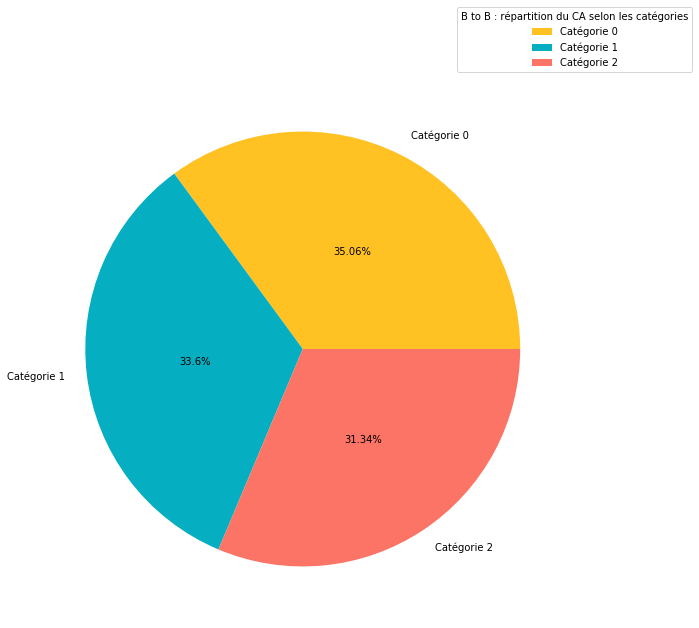

In [71]:
# Poids des catégories sur les ventes des B to B
cat_BtoB = df[df['client_id'].isin(outliers)].groupby('categ').sum().price.reset_index()

plt.figure(figsize=(12,10))
plt.pie(cat_BtoB.price,
        labels=['Catégorie 0','Catégorie 1','Catégorie 2'],
        colors = ['#FFC222','#05aec0','#fb7465'],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.5)
plt.legend(bbox_to_anchor = (1, 1), loc = 'lower center', 
           prop = {'size': 10}, 
           title ='B to B : répartition du CA selon les catégories')

In [72]:
# Dataframe sans outliers
dfs_SO = dfs[~dfs['client_id'].isin(set(outliers))]
df_SO = df[~df['client_id'].isin(set(outliers))]

### [1.1.2 Profil de consommation des juniors, cad - de 30 ans](#sommaire)
<a id="junior" a>

In [73]:
# Dataframe sur les juniors (exclusion des outliers)
dfs_30ans = dfs_SO[dfs_SO.age <=30]
dfs_30ans.head()

,session_id,sales_count,sales_sum,client_id,year,month,age,sex
0,s_118668,14,264.99,c_5995,2021,11,30,f
5,s_141902,11,192.20,c_317,2021,12,24,f
6,s_137262,11,160.36,c_4797,2021,12,18,m
9,s_118390,11,193.41,c_7467,2021,11,22,m
14,s_155361,11,177.62,c_6215,2022,1,28,f


In [82]:
# 1. Volume client
Volume_client_30 = dfs_30ans.groupby('client_id').count().count().session_id

# 2. Panier moyen 
Panier_moyen_30 = round((dfs_30ans.sales_sum.mean()),1)

# 3. Fréquence achat (moyenne anuelle de sessions)
Fréquence_achat_30 = round((dfs_30ans.groupby('client_id').agg({'session_id':'count'}).mean()),1)[0]

# 4. Nombre de sessions générées à l’année 
Nombre_sessions_générées_30 = round((dfs_30ans.groupby('client_id').agg({'session_id':'count'}).sum()),1)[0]

# 5. Valeur client annuelle 
Valeur_annuelle_client_30 = round((dfs_30ans.sales_sum.mean()),1) * round((dfs_30ans.groupby('client_id').agg({'session_id':'count'}).mean()),1)[0]

# 6. Contributuon au CA 
Proportion_femmes_30 = round((dfs_30ans.groupby('sex').count().client_id *100/ len(dfs_30ans)),2)[0]

# 7. Contributuon au CA 
Contribution_CA_30 = round((dfs_30ans.sales_sum.sum()*100 / dfs.sales_sum.sum()),2)

profil_conso.loc[1] = ['Clients de moins de 30 ans',
                       Volume_client_30,
                       Panier_moyen_30,
                       Fréquence_achat_30,
                       Nombre_sessions_générées_30,
                       Valeur_annuelle_client_30,
                       Proportion_femmes_30,
                       Contribution_CA_30]

profil_conso

,Segment,Volume_client,Panier_moyen,Fréquence_achat,Nombre_sessions_générées,Valeur_annuelle_client,Proportion_femmes,Contribution CA
0,Clients B to B,4,38.12,2848.0,11392,108560,50.00,7.48
1,Clients de moins de 30 ans,2266,70.60,9.1,20616,642.46,52.02,25.09
2,Clients de 31 à 50 ans,3365,31.60,24.2,81265,764.72,51.49,44.30


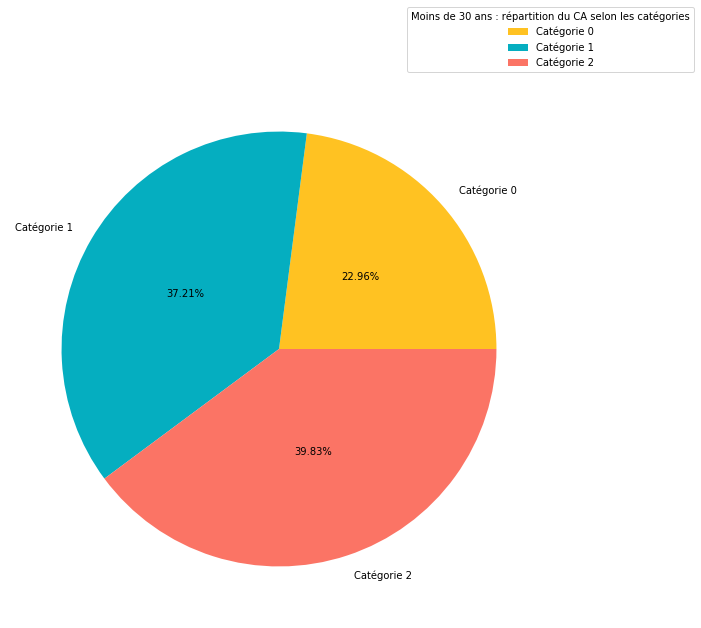

In [78]:
# 8. Quelles sont les catégories privilégiées des clients de - de 30 ans ?
cat_30ans = df[df['client_id'].isin(set(dfs_30ans.client_id))].groupby('categ').count().id_prod.reset_index()
total_cat_30ans = cat_30ans.id_prod *100 /cat_30ans.id_prod.sum()
total_cat_30ans = round(total_cat_30ans,2)
cat_30ans = cat_30ans.join(total_cat_30ans,lsuffix='effectif')

plt.figure(figsize=(12,10))
plt.pie(cat_30ans['id_prodeffectif'],
        labels=['Catégorie 0','Catégorie 1','Catégorie 2'],
        colors = ['#FFC222','#05aec0','#fb7465'],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.5)
plt.legend(bbox_to_anchor = (1, 1), loc = 'lower center', prop = {'size': 10},title ='Moins de 30 ans : répartition du CA selon les catégories')

### [1.1.3 Profil de consommation des clients middle age, cad de 31 de 50 ans](#sommaire)
<a id="middleage" a>

In [79]:
# # Dataframe sur middle age (exclusion des outliers)
dfs_31_50ans = dfs_SO[(dfs_SO.age >30) & (dfs_SO.age <=50)]
dfs_31_50ans.head()

,session_id,sales_count,sales_sum,client_id,year,month,age,sex
2,s_21005,13,162.20,c_8303,2021,4,32,m
3,s_168560,12,182.24,c_7855,2022,2,32,f
4,s_93892,12,130.58,c_8127,2021,9,34,f
8,s_86536,11,130.46,c_8286,2021,9,42,f
11,s_3533,11,232.30,c_7027,2021,3,41,f


In [83]:
# 1. Volume client
Volume_client_31_50 = dfs_31_50ans.groupby('client_id').count().count().session_id

# 2. Panier moyen B to B
Panier_moyen_31_50 = round((dfs_31_50ans.sales_sum.mean()),1)

# 3. Fréquence achat (moyenne anuelle de sessions) 
Fréquence_achat_31_50 = round((dfs_31_50ans.groupby('client_id').agg({'session_id':'count'}).mean()),1)[0]

# 4. Nombre de sessions générées à l’année B to B
Nombre_sessions_générées_31_50 = round((dfs_31_50ans.groupby('client_id').agg({'session_id':'count'}).sum()),1)[0]

# 5. Valeur client annuelle B to B
Valeur_annuelle_client_31_50 = round((dfs_31_50ans.sales_sum.mean()),1) * round((dfs_31_50ans.groupby('client_id').agg({'session_id':'count'}).mean()),1)[0]

# 6. Contributuon au CA B to B
Proportion_femmes_31_50 = round((dfs_31_50ans.groupby('sex').count().client_id *100/ len(dfs_31_50ans)),2)[0]

# 7. Contributuon au CA annuel junior
Contribution_CA_31_50 = round((dfs_31_50ans.sales_sum.sum()*100 / dfs.sales_sum.sum()),2)

profil_conso.loc[2] = ['Clients de 31 à 50 ans',
                       Volume_client_31_50,
                       Panier_moyen_31_50,
                       Fréquence_achat_31_50,
                       Nombre_sessions_générées_31_50,
                       Valeur_annuelle_client_31_50,
                       Proportion_femmes_31_50,
                       Contribution_CA_31_50]

profil_conso

,Segment,Volume_client,Panier_moyen,Fréquence_achat,Nombre_sessions_générées,Valeur_annuelle_client,Proportion_femmes,Contribution CA
0,Clients B to B,4,38.12,2848.0,11392,108560,50.00,7.48
1,Clients de moins de 30 ans,2266,70.60,9.1,20616,642.46,52.02,25.09
2,Clients de 31 à 50 ans,3365,31.60,24.2,81265,764.72,51.49,44.30


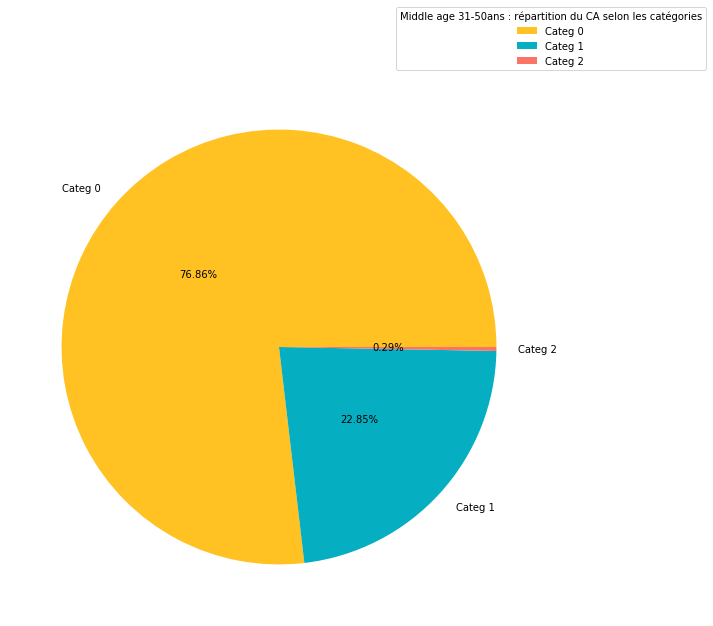

In [84]:
# Quelles sont les catégories privilégiées des clients entre 30ans et 50ans ?
cat_31_50ans = df[df['client_id'].isin(set(dfs_31_50ans.client_id))].groupby('categ').count().id_prod.reset_index()
total_cat_31_50ans = cat_31_50ans.id_prod *100 /cat_31_50ans.id_prod.sum()
total_cat_31_50ans = round(total_cat_31_50ans,2)
cat_31_50ans = cat_31_50ans.join(total_cat_31_50ans,lsuffix='effectif')
cat_31_50ans


# Poids des catégories sur les ventes de 31 à 50 ans
plt.figure(figsize=(12,10))

plt.pie(cat_31_50ans['id_prodeffectif'],
        labels=['Categ 0','Categ 1','Categ 2'],
        colors = ['#FFC222','#05aec0','#fb7465'],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.5)
plt.legend(bbox_to_anchor = (1, 1), loc = 'lower center', prop = {'size': 10},title ='Middle age 31-50ans : répartition du CA selon les catégories')


### [1.1.4 Profil de consommation des clients seniors, cad + de 51 ans ](#sommaire)
<a id="senior" a>

In [85]:
# Dataframe sur plus de 50 ans (exclusion des outliers)
dfs_50ans = dfs_SO[(dfs_SO.age >50)]
dfs_50ans.head()

,session_id,sales_count,sales_sum,client_id,year,month,age,sex
1,s_96857,13,277.31,c_5523,2021,9,52,f
10,s_36768,11,177.80,c_3212,2021,5,67,f
13,s_136877,11,138.89,c_7301,2021,12,54,f
18,s_112803,11,147.55,c_8012,2021,10,79,m
19,s_21641,11,180.75,c_7924,2021,4,51,f


In [87]:
# 1. Volume client
Volume_client_50 = dfs_50ans.groupby('client_id').count().count().session_id

# 2. Panier moyen B to B
Panier_moyen_50 = round((dfs_50ans.sales_sum.mean()),1)

# 3. Fréquence achat (moyenne anuelle de sessions) 
Fréquence_achat_50 = round((dfs_50ans.groupby('client_id').agg({'session_id':'count'}).mean()),1)[0]

# 4. Nombre de sessions générées à l’année B to B
Nombre_sessions_générées_50 = round((dfs_50ans.groupby('client_id').agg({'session_id':'count'}).sum()),1)[0]

# 5. Valeur client annuelle B to B
Valeur_annuelle_client_50 = round((dfs_50ans.sales_sum.mean()),1) * round((dfs_50ans.groupby('client_id').agg({'session_id':'count'}).mean()),1)[0]

# 6. Contributuon au CA B to B
Proportion_femmes_50 = round((dfs_50ans.groupby('sex').count().client_id *100/ len(dfs_50ans)),2)[0]

# 7. Contributuon au CA annuel junior
Contribution_CA_50 = round((dfs_50ans.sales_sum.sum()*100 / dfs.sales_sum.sum()),2)

profil_conso.loc[3] = ['Clients de plus de 50 ans',
                       Volume_client_50,
                       Panier_moyen_50,
                       Fréquence_achat_50,
                       Nombre_sessions_générées_50,
                       Valeur_annuelle_client_50,
                       Proportion_femmes_50,
                       Contribution_CA_50]

profil_conso

,Segment,Volume_client,Panier_moyen,Fréquence_achat,Nombre_sessions_générées,Valeur_annuelle_client,Proportion_femmes,Contribution CA
0,Clients B to B,4,38.12,2848.0,11392,108560,50.00,7.48
1,Clients de moins de 30 ans,2266,70.60,9.1,20616,642.46,52.02,25.09
2,Clients de 31 à 50 ans,3365,31.60,24.2,81265,764.72,51.49,44.3
3,Clients de plus de 50 ans,2965,24.00,18.9,55972,453.6,53.26,23.13


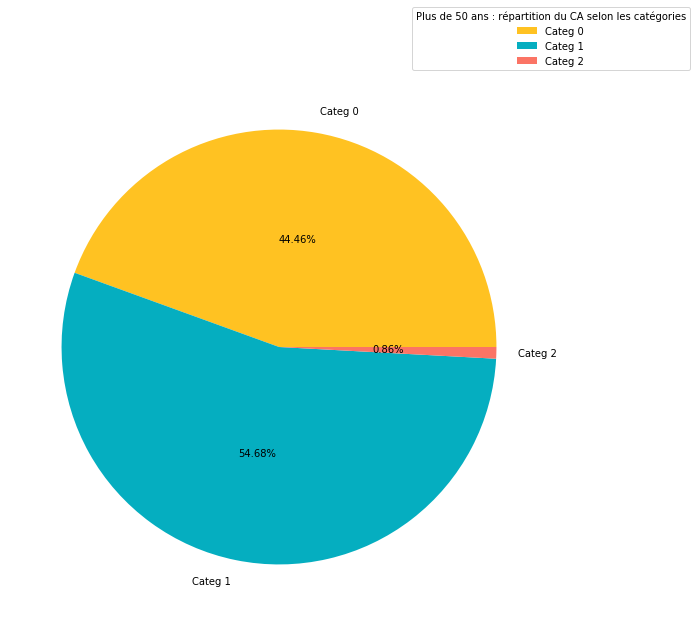

In [88]:
# Quelles sont les catégories privilégiées des clients de plus de 50ans ?
cat_50ans = df[df['client_id'].isin(set(dfs_50ans.client_id))].groupby('categ').count().id_prod.reset_index()
total_cat_50ans = cat_50ans.id_prod *100 /cat_50ans.id_prod.sum()
total_cat_50ans = round(total_cat_50ans,2)
cat_50ans = cat_50ans.join(total_cat_50ans,lsuffix='effectif')
cat_50ans

# Poids des catégories sur les ventes des + de 50 ans
plt.figure(figsize=(12,10))
plt.pie(cat_50ans['id_prodeffectif'],
        labels=['Categ 0','Categ 1','Categ 2'],
        colors = ['#FFC222','#05aec0','#fb7465'],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.5)
plt.legend(bbox_to_anchor = (1, 1), loc = 'lower center', prop = {'size': 10},title ='Plus de 50 ans : répartition du CA selon les catégories')


### [1.1.5 Focus sur les mauvais clients ](#sommaire)
<a id="mauvais" a>

In [96]:
df_session = df.groupby('client_id').agg({'session_id' : 'count'}).sort_values('session_id', ascending = False)

# Client comptabilisant une unique session
print('Clients comptabilisant une session unique :', df_session[df_session.session_id == 1].count()[0])
print('Clients comptabilisant seulement 2 sessions :', df_session[df_session.session_id == 2].count()[0])

Clients comptabilisant une session unique : 36
Clients comptabilisant seulement 2 sessions : 86


In [65]:
# Client comptabilisant aucune vente
dfc[~dfc['client_id'].isin(set(df.client_id))].groupby('sex').count().client_id

sex
f    11
m    10
Name: client_id, dtype: int64

### [1.1.6 Dépense client ](#sommaire)
<a id="depense" a>

In [98]:
# Dépenses par client (toutes catégories confondues)
depense_par_client = df.price.groupby(df.client_id).sum().sort_values(ascending = False)
depense_par_client.head()

client_id
c_1609    162007.34
c_4958    144257.21
c_6714     73218.62
c_3454     54464.20
c_7959      2564.25
Name: price, dtype: float64

No handles with labels found to put in legend.


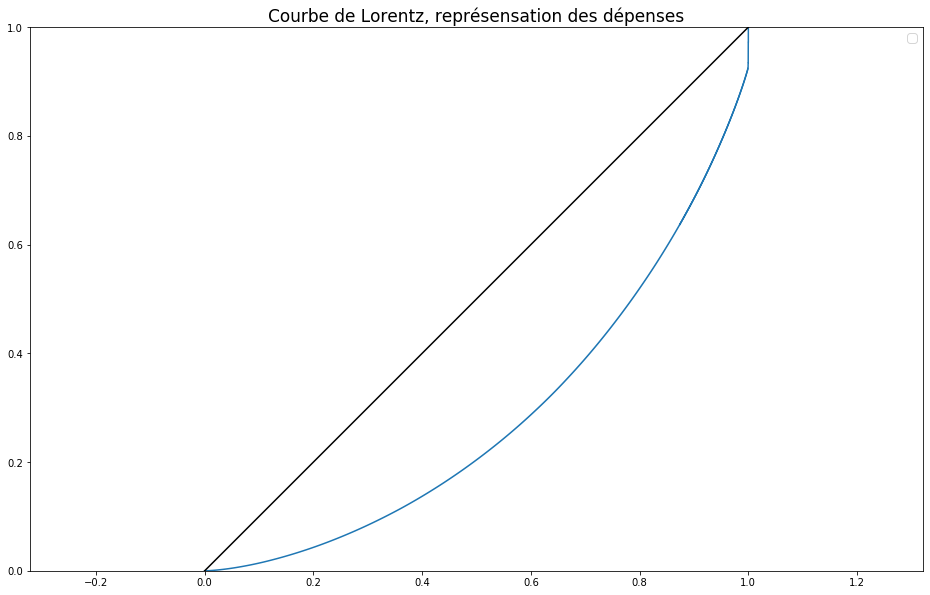

In [99]:
# Courbe de Lorenz avec valeurs extremes client
n = len(depense_par_client)
lorenz = np.cumsum(np.sort(depense_par_client)) / depense_par_client.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'solid')
plt.title('Courbe de Lorentz, représensation des dépenses',fontsize=17)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(prop = {'size': 12})
plt.gcf().set_size_inches(16, 10)
plt.show()




In [100]:
# PARETO 80- 20 
dfs_pareto = dfs.groupby('client_id').sum().sort_values('sales_sum', ascending = False).sales_sum.to_frame()
dfs_pareto['part_somme_cumulée'] = dfs_pareto.sales_sum * 100 / dfs.sales_sum.sum()
dfs_pareto.head()

,sales_sum,part_somme_cumulée
client_id,,
c_1609,162207.81,2.796535
c_4958,144257.21,2.487059
c_6714,73308.88,1.263878
c_3454,54464.20,0.938987
c_7959,2564.25,0.044209


In [105]:
# Combien de personnes représentent 20 % du CA ?
dfs_pareto['part_somme_cumulée'] = dfs_pareto.sales_sum.cumsum() * 100 / dfs.sales_sum.sum()
print ('Nombre de personnes représentant 20% du CA :', dfs_pareto[dfs_pareto.part_somme_cumulée <=20].count()[0],'personnes') 
print ('Nombre de personnes représentant 50% du CA :', dfs_pareto[dfs_pareto.part_somme_cumulée <=50].count()[0],'personnes') 
print ('Nombre de personnes représentant 80% du CA :', dfs_pareto[dfs_pareto.part_somme_cumulée <=80].count()[0],'personnes') 
print ('Nombre de personnes représentant 100% du CA :', dfs_pareto[dfs_pareto.part_somme_cumulée <=100].count()[0],'personnes') 



Nombre de personnes représentant 20% du CA : 393 personnes
Nombre de personnes représentant 50% du CA : 1838 personnes
Nombre de personnes représentant 80% du CA : 4347 personnes
Nombre de personnes représentant 100% du CA : 8599 personnes


## [1.2 Offre produits](#sommaire)
<a id="produit" a>

In [156]:
# Matrice statistique des indicateurs
stat_price = dfp.groupby('categ').describe().transpose().reset_index()
stat_price = stat_price.rename(columns={"categ": "index","level_1": "indicateur", 0: "Catégorie 0",1: "Catégorie 1",2: "Catégorie 2"})

# Ajout du Skewness
stat_price.loc[8] = ['price',
                 'skewness',
                 dfp[dfp.categ == 0].skew().price,
                 dfp[dfp.categ == 1].skew().price,
                 dfp[dfp.categ == 2].skew().price]


# Ajout du Kurtosis
stat_price.loc[9] = ['price',
                 'kurtosis',
                 dfp[dfp.categ == 0].kurt().price,
                 dfp[dfp.categ == 1].kurt().price,
                 dfp[dfp.categ == 2].kurt().price]


stat_price = round(stat_price,2)
stat_price 

categ,level_0,indicateur,Catégorie 0,Catégorie 1,Catégorie 2
0,price,count,2308.00,739.00,239.00
1,price,mean,11.73,25.53,108.35
2,price,std,7.57,15.43,49.56
3,price,min,0.62,2.00,30.99
4,price,25%,5.59,13.39,71.06
5,price,50%,10.32,22.99,101.99
6,price,75%,16.66,33.99,136.53
7,price,max,40.99,80.99,300.00
8,price,skewness,0.84,0.81,0.93
9,price,kurtosis,0.33,0.30,0.81


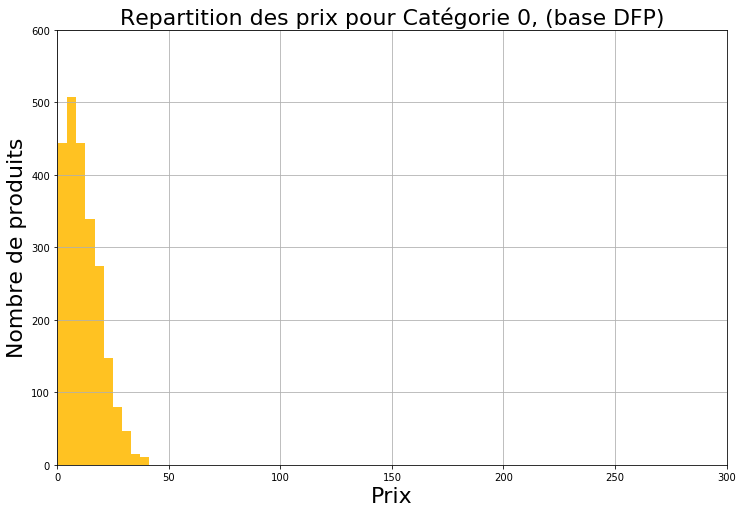

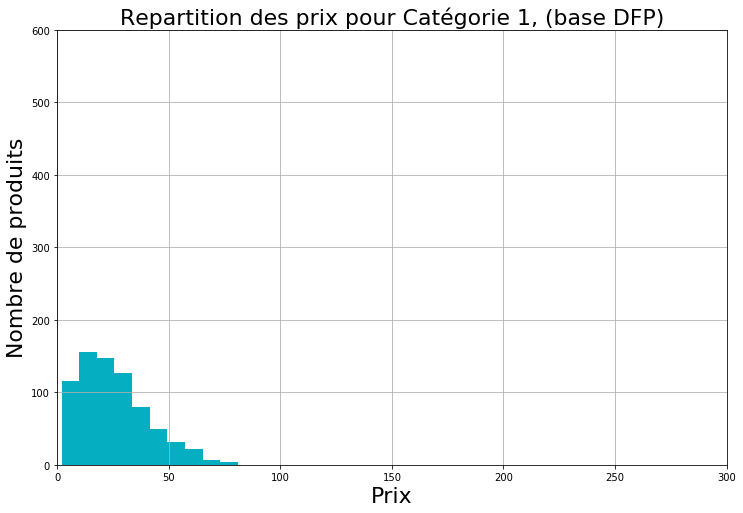

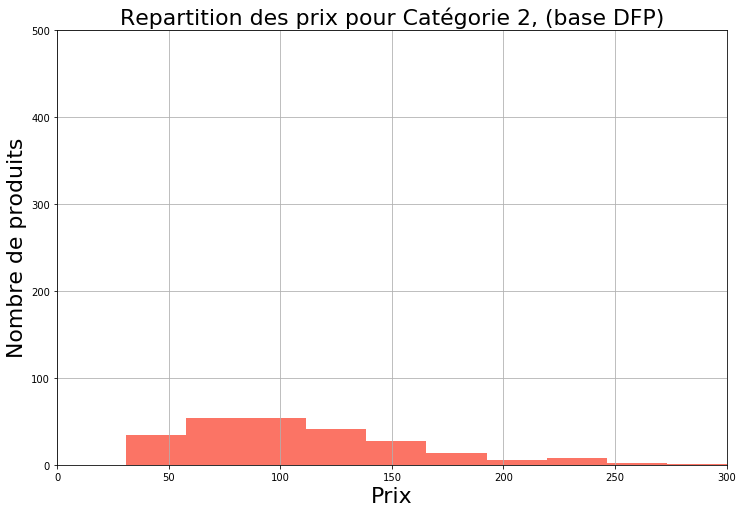

In [177]:
# Histogramme : répartition des prix de la cat 0
 
# Catégorie 0
dfp[dfp.categ == 0].price.hist(color='#FFC222')
plt.title('Repartition des prix pour Catégorie 0, (base DFP)', fontsize = 22)
plt.ylabel('Nombre de produits',fontsize = 22)
plt.xlabel('Prix',fontsize = 22)
plt.xlim(0, 300)
plt.ylim(0, 600)
plt.gcf().set_size_inches(12, 8)
plt.show()

# Histogramme : répartition des prix de la cat 1
dfp[dfp.categ == 1].price.hist(color='#05aec0')
plt.title('Repartition des prix pour Catégorie 1, (base DFP)',fontsize = 22)
plt.ylabel('Nombre de produits',fontsize = 22)
plt.xlabel('Prix',fontsize = 22)
plt.ylim(0, 600)
plt.xlim(0, 300)
plt.gcf().set_size_inches(12, 8)
plt.show()


# Histogramme : répartition des prix de la cat 2 
dfp[dfp.categ == 2].price.hist(color='#fb7465')
plt.title('Repartition des prix pour Catégorie 2, (base DFP)',fontsize = 22)
plt.ylabel('Nombre de produits',fontsize = 22)
plt.xlabel('Prix',fontsize = 22)
plt.ylim(0, 500)
plt.xlim(0, 300)
plt.gcf().set_size_inches(12, 8)
plt.show()


## [1.3 Santé financière](#sommaire)
<a id="sante" a>

In [178]:
# Construction du dataframe CA mensuel
dfs['month_year'] = dfs.month.map(str) + '/' + dfs.year.map(str) 

SF = dfs.groupby('month_year').agg({'sales_count' :'sum','sales_sum': 'sum' }).reset_index().sort_values('month_year',ascending = True)

new_index = [5,6,7,8,9,10,11,1,2,3,0,4]
SF = SF.reindex(new_index)

SF

,month_year,sales_count,sales_sum
5,3/2021,28574,479478.18
6,4/2021,28430,473332.05
7,5/2021,28259,489688.07
8,6/2021,26835,481639.05
9,7/2021,24737,481421.45
10,8/2021,25632,479644.70
11,9/2021,33275,502997.32
1,10/2021,21596,319396.24
2,11/2021,28292,513173.30
3,12/2021,32441,523321.44


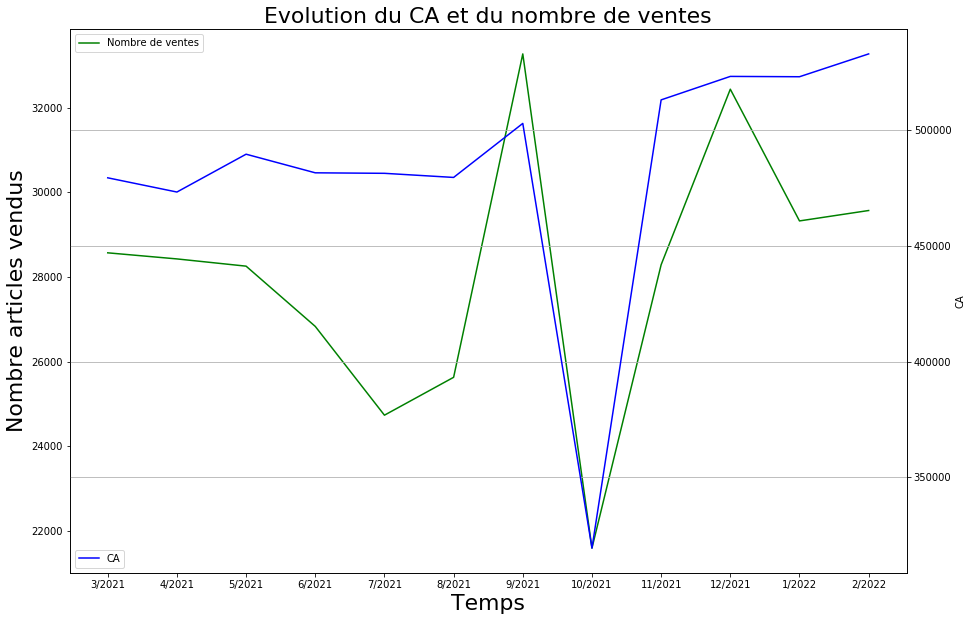

In [180]:
# Représentation graphique du nombre de vente et CA par mois 
x = SF.month_year
y1 = SF.sales_count
y2 = SF.sales_sum

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Temps',fontsize = 22)
ax1.set_ylabel('Nombre articles vendus',fontsize = 22)
ax2.set_ylabel('CA')
ax1.legend(['Nombre de ventes'], loc='upper left')
ax2.legend(['CA'], loc='lower left')
plt.title('Evolution du CA et du nombre de ventes',fontsize = 22)
plt.gcf().set_size_inches(15, 10)
plt.grid()
plt.show()

In [181]:
# Commerce sur le mois de octobre
OCT = dfs[dfs.month == 10].groupby('day').sum().reset_index()

x = OCT.day
y1 = OCT.sales_count
y2 = OCT.sales_sum

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Jour',fontsize = 22)
ax1.set_ylabel('Nombre articles vendus',fontsize = 22)
ax2.set_ylabel('CA')
ax1.legend(['Nombre de ventes'], loc='upper left')
ax2.legend(['CA'], loc='lower left')
plt.title('Commerce du mois octobre',fontsize = 22)
plt.gcf().set_size_inches(15, 10)
plt.grid()
plt.show()

KeyError: 'day'

In [454]:
OCT.head()

,day,sales_count,sales_sum,year,month,age
0,1,1050,16993.89,1018584,5040,23859
1,2,691,9080.89,715434,3540,15874
2,3,687,8947.65,729581,3610,15960
3,4,644,9206.07,725539,3590,16295
4,5,644,9538.84,741707,3670,16468


In [112]:
# Recherche d'une catégorie particulière expliquant pe les ruptures ? / AUCUN PRODUIT CAT 1 du 2 au 27 inclus - Slide 19
df[(df.month == 10) & (df.day > 2) & (df.day < 28)].groupby('categ').sum().price

categ
0.0    161300.02
2.0     68987.96
Name: price, dtype: float64

## [1.4 Connexions](#sommaire)
<a id="connexions" a>

In [183]:
SESSION.head()

NameError: name 'SESSION' is not defined

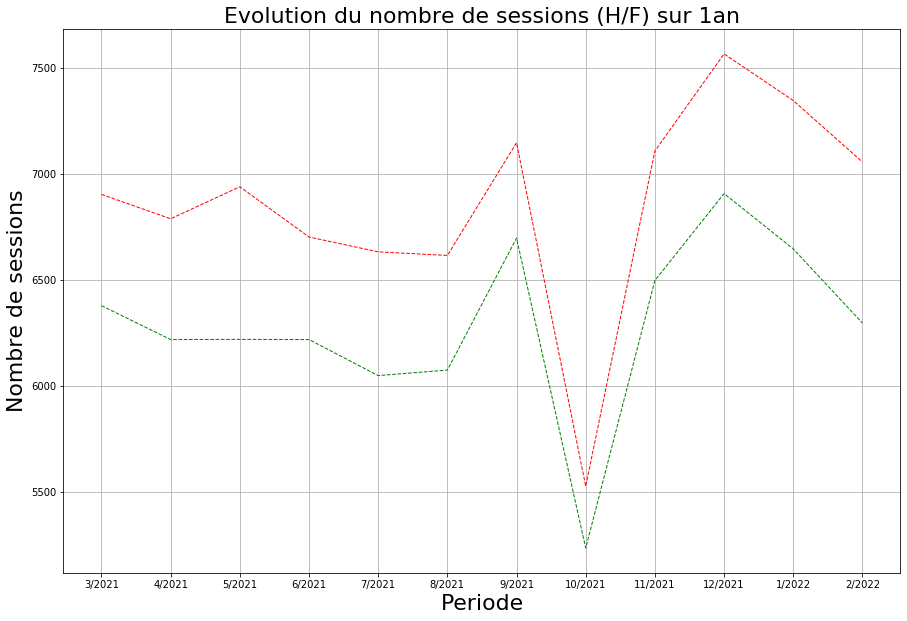

In [184]:
# Graphique representant le nombre de sessions Homme et Femme(slide 20)
SESSION = df[~df['client_id'].isin(outliers)].drop_duplicates(subset='session_id', keep="last").groupby(['sex','year','month']).agg({'session_id':'count'}).reset_index()
SESSION['month_year'] = SESSION.month.map(str) + '/' + SESSION.year.map(str) 

x = SESSION[SESSION.sex =='f'].month_year
y1 = SESSION[SESSION.sex =='f'].session_id
y2 = SESSION[SESSION.sex =='m'].session_id

plt.subplot()
plt.plot(x, y1, "r--", linewidth=1,label="Femme")
plt.plot(x, y2, "g--", linewidth=1,label="Homme")
plt.xlabel('Periode',fontsize = 22)
plt.ylabel('Nombre de sessions',fontsize = 22)
plt.title('Evolution du nombre de sessions (H/F) sur 1an',fontsize = 22)
plt.gcf().set_size_inches(15, 10)
plt.grid(True)

## [2. Recherche de corrélations](#sommaire)
<a id="corrélation" a>

## [2.1 Corrélation sexe et catégorie produits achetés](#sommaire)
<a id="sexe_catégorie" a>

In [185]:
# Tableau de contingeance
X = "categ"
Y = "sex"

c = df[~df['client_id'].isin(outliers)][[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()  

tx = df[X].value_counts() 
ty = df[Y].value_counts()  


cont.loc[:,"Total"] = tx 
cont.loc["total",:] = ty 
cont.loc["total","Total"] = len(df)
cont

sex,f,m,Total
categ,,,
0.0,101206.0,94064.0,209529.0
1.0,53774.0,48851.0,109735.0
2.0,8122.0,7634.0,17552.0
total,167575.0,169241.0,336816.0


In [186]:
# Tableau de contingeance
X = "categ"
Y = "sex"

c = df_SO[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()  

tx = df_SO[X].value_counts() 
ty = df_SO[Y].value_counts()  


cont.loc[:,"Total"] = tx 
cont.loc["total",:] = ty 
cont.loc["total","Total"] = len(df_SO)
cont

sex,f,m,Total
categ,,,
0.0,101206.0,94064.0,195270.0
1.0,53774.0,48851.0,102625.0
2.0,8122.0,7634.0,15756.0
total,163102.0,150549.0,313651.0


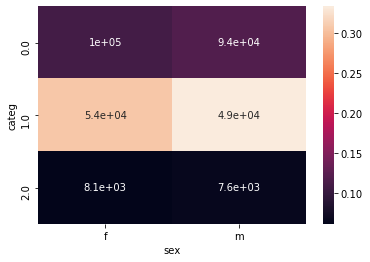

In [187]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)

tx.columns = ["foo"]
ty.columns = ["foo"]

n = len(df_SO)
indep = tx.dot(ty.T)/n 


c = c.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
sns.heatmap(measure/xi_n,annot=c)
plt.show()

In [188]:
# Test du Chi 2
chi2, p, dof,expected = stats.chi2_contingency(c)
stats.chi2_contingency(c)

(10.110865513726571,
 0.006374607510181767,
 2,
 array([[101542.56654689,  93727.43345311],
        [ 53366.13863817,  49258.86136183],
        [  8193.29481494,   7562.70518506]]))

## [2.2 Corrélation Age et Montant total achat](#sommaire)
<a id="montant_total_achat" a>

In [144]:
COR1 = dfs[~dfs['client_id'].isin(outliers)].groupby('client_id').agg({'sales_sum':'sum', 'age' :'mean'})

In [148]:
Y = list(COR1.sales_sum)
X = list(COR1.age)
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
result

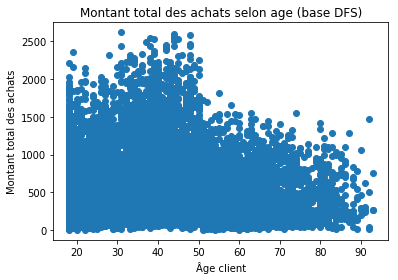

In [152]:
# Graphique 
plt.scatter(X,Y)
plt.title('Montant total des achats selon age (base DFS)')
plt.xlabel('Âge client')
plt.ylabel('Montant total des achats')
plt.show()

In [149]:
# Recherche du coefficient de variation linéaire
print(stats.linregress(X,Y))

LinregressResult(slope=-5.2795205188668595, intercept=864.0213054684359, rvalue=-0.19195872602086458, pvalue=3.8610341399322895e-72, stderr=0.2911630965322627)


In [153]:
# Recherche du coeeficient pour corrélation non linéaire 
spearmanr(X,Y)

SpearmanrResult(correlation=-0.1935893114164797, pvalue=2.315111407762664e-73)

In [150]:
# Découpage en catégorie d'age 
dfs['categ_cor'] = pd.cut(dfs[~dfs['client_id'].isin(outliers)].age,[15,30,50,90],labels=["Junior","Middle age","Senior"])




In [299]:
COR1['categ_cor'] = pd.cut(COR1.age,[19,30,50,90],labels=["Junior","Middle age","Senior"])

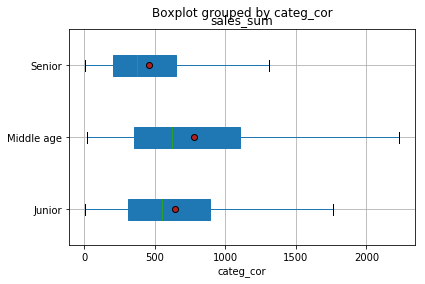

In [342]:
# Graphique pour ANOVA 
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
COR1.boxplot(column="sales_sum",by="categ_cor",showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)


In [301]:
COR1.head()

,sales_sum,age,categ_cor
client_id,,,
c_1,300.65,67,Senior
c_10,586.18,66,Senior
c_100,222.87,30,Junior
c_1000,1073.00,56,Senior
c_1001,1102.45,40,Middle age


In [302]:
# ANOVA POUR COR1
COR1_DF = COR1.loc[:,['sales_sum', 'categ_cor']] 
COR1_ANOVA = statsmodels.formula.api.ols('sales_sum ~ categ_cor', data = COR1_DF).fit()
table = statsmodels.api.stats.anova_lm(COR1_ANOVA)
table

,df,sum_sq,mean_sq,F,PR(>F)
categ_cor,2.0,1.607591e+08,8.037957e+07,407.427286,3.157484e-169
Residual,8000.0,1.578285e+09,1.972857e+05,NaN,NaN


In [303]:
print(COR1_ANOVA.summary2())

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.092      
Dependent Variable:     sales_sum           AIC:                   120290.3719
Date:                   2019-11-20 21:54    BIC:                   120311.3347
No. Observations:       8003                Log-Likelihood:        -60142.    
Df Model:               2                   F-statistic:           407.4      
Df Residuals:           8000                Prob (F-statistic):    3.16e-169  
R-squared:              0.092               Scale:                 1.9729e+05 
------------------------------------------------------------------------------
                          Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------------------
Intercept                644.8609  10.8237  59.5785 0.0000  623.6436  666.0783
categ_cor[T.Middle age]  131.3324  13.2583   9.9057 0.0000  105.3428  157.32

## [2.3 Corrélation Age et fréquence des achats](#sommaire)
<a id="frequence_achat" a>

In [457]:
COR2 = df[~df['client_id'].isin(outliers)].drop_duplicates(subset='session_id', keep="last").groupby(['client_id']).agg({'session_id':'count', 'age' :'max'}).reset_index()
COR2['Freq_achat'] = COR2.session_id /12
COR2.head()



,client_id,session_id,age,Freq_achat
0,c_1,15,67,1.250000
1,c_10,16,66,1.333333
2,c_100,3,30,0.250000
3,c_1000,42,56,3.500000
4,c_1001,24,40,2.000000


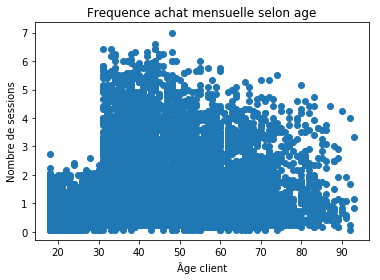

In [351]:
# Graphique 
plt.scatter(X2,Y2)
plt.title('Frequence achat mensuelle selon age')
plt.xlabel('Âge client')
plt.ylabel('Nombre de sessions')
plt.show()

In [264]:
# Recherche du coefficient de variation linéaire
print(stats.linregress(X2,Y2))

LinregressResult(slope=0.01256549305797306, intercept=0.9802486265439283, rvalue=0.16783790814630994, pvalue=2.4242502199031183e-55, stderr=0.0007961356107298006)


In [265]:
# Recherche du coeeficient pour corrélation non linéaire 
spearmanr(X2,Y2)

SpearmanrResult(correlation=0.2176122944410512, pvalue=1.1556411023609474e-92)

In [305]:
COR2['categ_cor'] = pd.cut(COR2.age,[19,30,50,90],labels=["Junior","Middle age","Senior"])

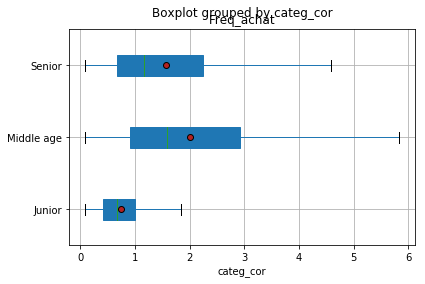

In [306]:
# Graphique pour ANOVA 
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
COR2.boxplot(column="Freq_achat",by="categ_cor",showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)


In [344]:
# ANOVA POUR COR2
COR2_DF = COR2.loc[:,['Freq_achat', 'categ_cor']] 
COR2_ANOVA = statsmodels.formula.api.ols('Freq_achat ~ categ_cor', data = COR2_DF).fit()
table2 = statsmodels.api.stats.anova_lm(COR2_ANOVA)
table2

,df,sum_sq,mean_sq,F,PR(>F)
categ_cor,2.0,1786.882638,893.441319,621.771403,1.014194e-251
Residual,8000.0,11495.431463,1.436929,NaN,NaN


In [343]:
print(COR2_ANOVA.summary2())

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.134     
Dependent Variable:  Freq_achat       AIC:                25615.6823
Date:                2019-11-24 22:10 BIC:                25636.6450
No. Observations:    8003             Log-Likelihood:     -12805.   
Df Model:            2                F-statistic:        621.8     
Df Residuals:        8000             Prob (F-statistic): 1.01e-251 
R-squared:           0.135            Scale:              1.4369    
--------------------------------------------------------------------
                        Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.7502   0.0292 25.6820 0.0000 0.6929 0.8075
categ_cor[T.Middle age] 1.2616   0.0358 35.2583 0.0000 1.1914 1.3317
categ_cor[T.Senior]     0.8234   0.0366 22.4952 0.0000 0.7516 0.8951
-----------------------------------------------------

## [2.4 Corrélation Age et panier moyen d'achats](#sommaire)
<a id="panier_moyen" a>

In [245]:
COR3 = dfs[~dfs['client_id'].isin(outliers)].groupby('client_id').agg({'sales_count':'mean', 'age' :'mean'})

In [246]:
COR3.columns = ['Nbre_article_panier','age']
COR3.head()

,Nbre_article_panier,age
client_id,,
c_1,1.333333,67
c_10,1.750000,66
c_100,2.000000,30
c_1000,1.441860,56
c_1001,2.416667,40


In [247]:
Y3 = list(COR3.Nbre_article_panier)
X3 = list(COR3.age)
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
result

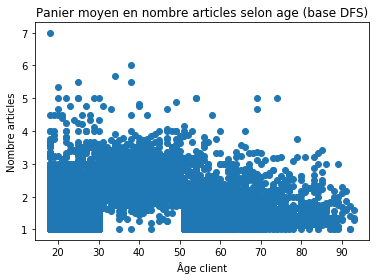

In [248]:
# Graphique 
plt.scatter(X3,Y3)
plt.title('Panier moyen en nombre articles selon age (base DFS)')
plt.xlabel('Âge client')
plt.ylabel('Nombre articles')
plt.show()

In [249]:
# Recherche du coefficient de variation linéaire
print(stats.linregress(X3,Y3))

LinregressResult(slope=-0.008731560381481858, intercept=2.3748845571368222, rvalue=-0.22739402518765542, pvalue=3.1418965301098976e-101, stderr=0.00040335381711714013)


In [250]:
# Recherche du coeeficient pour corrélation non linéaire 
spearmanr(X3,Y3)

SpearmanrResult(correlation=-0.2196141939850719, pvalue=2.2052559921350642e-94)

In [309]:
COR3['categ_cor'] = pd.cut(COR3.age,[19,30,50,90],labels=["Junior","Middle age","Senior"])

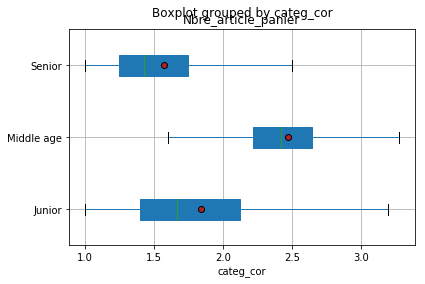

In [310]:
# Graphique pour ANOVA 
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
COR3.boxplot(column="Nbre_article_panier",by="categ_cor",showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)


In [345]:
# ANOVA POUR COR3
COR3_DF = COR3.loc[:,['Nbre_article_panier', 'categ_cor']] 
COR3_ANOVA = statsmodels.formula.api.ols('Nbre_article_panier ~ categ_cor', data = COR3_DF).fit()
table3 = statsmodels.api.stats.anova_lm(COR3_ANOVA)
table3

,df,sum_sq,mean_sq,F,PR(>F)
categ_cor,2.0,1321.531313,660.765656,2598.633176,0.0
Residual,8000.0,2034.194476,0.254274,NaN,NaN


In [346]:
print(COR3_ANOVA.summary2())

                    Results: Ordinary least squares
Model:                OLS                 Adj. R-squared:     0.394     
Dependent Variable:   Nbre_article_panier AIC:                11755.6885
Date:                 2019-11-24 22:14    BIC:                11776.6512
No. Observations:     8003                Log-Likelihood:     -5874.8   
Df Model:             2                   F-statistic:        2599.     
Df Residuals:         8000                Prob (F-statistic): 0.00      
R-squared:            0.394               Scale:              0.25427   
------------------------------------------------------------------------
                         Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                1.8414   0.0123 149.8503 0.0000  1.8173  1.8654
categ_cor[T.Middle age]  0.6278   0.0151  41.7085 0.0000  0.5983  0.6573
categ_cor[T.Senior]     -0.2684   0.0154 -17.4348 0.0000 -0.2986 -0.2383

## [2.5 Corrélation Age et catégories de produits achetés](#sommaire)
<a id="produit_achetés" a>

In [439]:
df['categ_cor'] = pd.cut(df.age,[19,30,50,90],labels=["Junior","Middle age","Senior"])

In [440]:
DF_COR4 = df[~df['client_id'].isin(outliers)].loc[:,['categ', 'categ_cor','age']]

In [441]:
DF_COR4 = DF_COR4[DF_COR4.age > 18]

In [442]:
DF_COR4.categ = DF_COR4["categ"].astype('object')

In [443]:
DF_COR4.head()

,categ,categ_cor,age
0,0,Middle age,45
1,2,Junior,22
2,1,Middle age,43
3,0,Senior,59
4,0,Middle age,42


In [444]:
DF_COR4.dtypes

categ          object
categ_cor    category
age             int64
dtype: object

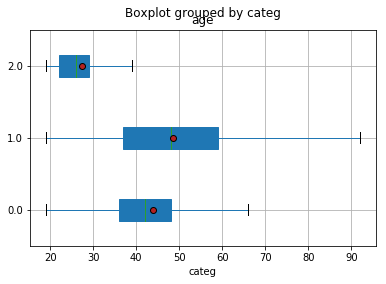

In [445]:
# Graphique pour ANOVA 
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
DF_COR4.boxplot(column="age",by="categ",showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)


In [448]:
# ANOVA POUR COR4
DF_COR4 = DF_COR4.loc[:,['age', 'categ']] 
COR4_ANOVA = statsmodels.formula.api.ols('age ~ categ', data = DF_COR4).fit()
table4 = statsmodels.api.stats.anova_lm(COR4_ANOVA)
table4

,df,sum_sq,mean_sq,F,PR(>F)
categ,2.0,5.422069e+06,2.711035e+06,16906.727812,0.0
Residual,306300.0,4.911594e+07,1.603524e+02,NaN,NaN


In [449]:
print(COR4_ANOVA.summary2())

                   Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.099       
Dependent Variable: age              AIC:                2424468.1357
Date:               2019-11-26 21:53 BIC:                2424500.0327
No. Observations:   306303           Log-Likelihood:     -1.2122e+06 
Df Model:           2                F-statistic:        1.691e+04   
Df Residuals:       306300           Prob (F-statistic): 0.00        
R-squared:          0.099            Scale:              160.35      
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
---------------------------------------------------------------------
Intercept         44.0222   0.0288 1529.6373 0.0000  43.9657  44.0786
categ[T.1.0]       4.6154   0.0493   93.5518 0.0000   4.5187   4.7121
categ[T.2.0]     -16.5069   0.1154 -143.0169 0.0000 -16.7331 -16.2807
---------------------------------------